## Задания

1. Получите таблицу с пассажирами с четными значениями для "PassengerId".

In [114]:
pass_data[pass_data['PassengerId'] % 2 == 0]

,PassengerId,Survived,Pclass,Name,sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


2. Сколько мужчин, а сколько женщин в выборке?

In [163]:
pass_data["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

3. Постройте 2 гистограммы по возрасту -- для мужчин, путешествовавших первым классом и третьим.

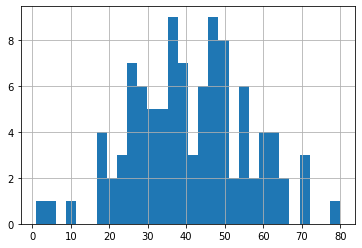

In [149]:
pass_data[(pass_data['sex'] == 'male') & (pass_data['Pclass'] == 1)].Age.hist(bins = 30);

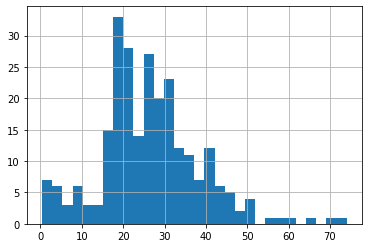

In [150]:
pass_data[(pass_data['sex'] == 'male') & (pass_data['Pclass'] == 3)].Age.hist(bins = 30);

4. Кажется (и это звучит логично), что в первом классе ездили более возрастные люди. Насколько в среднем пассажир первого класса старше, чем пассажир третьего?

In [152]:
pass_data[pass_data['Pclass'] == 1].Age.mean()

38.233440860215055

In [153]:
pass_data[pass_data['Pclass'] == 3].Age.mean()

25.14061971830986

In [138]:
pass_data[pass_data['Pclass'] == 1].Age.mean() - pass_data[pass_data['Pclass'] == 3].Age.mean()

13.092821141905194

5. Каков cредний возраст мужчин и женщин каждого класса?

In [155]:
pass_data.groupby(["sex", "Pclass"]).Age.max()

sex     Pclass
female  1         63.0
        2         57.0
        3         63.0
male    1         80.0
        2         70.0
        3         74.0
Name: Age, dtype: float64

6. В таблице `prices` у вас есть модели телевизоров с ценами, а в таблице `brands` соответствие моделей и брендов. Какая средняя цена телевизоров для каждого бренда?

In [156]:
prices = pd.DataFrame([['s1055', 62500], ['s2065', 83700], ['s2055', 67900], \
                     ['lg12355', 57800],['lg12365', 79400],['ss465', 74300], \
                     ['ss455', 69000],['ss375', 77600],['ss365', 70300], \
                     ['ss345', 54500]], columns=['model_name', 'price'])

brands = pd.DataFrame([['sony', 's1055'], ['sony', 's2065'], ['sony', 's2055'], \
                     ['lg', 'lg12355'],['lg', 'lg12365'],['samsung', 'ss465'], \
                     ['samsung', 'ss455'],['samsung', 'ss375'],['samsung', 'ss365'], \
                     ['samsung', 'ss345']], columns=['brand name', 'model_name'])

In [157]:
prices

,model_name,price
0,s1055,62500
1,s2065,83700
2,s2055,67900
3,lg12355,57800
4,lg12365,79400
5,ss465,74300
6,ss455,69000
7,ss375,77600
8,ss365,70300
9,ss345,54500


In [158]:
brands

,brand name,model_name
0,sony,s1055
1,sony,s2065
2,sony,s2055
3,lg,lg12355
4,lg,lg12365
5,samsung,ss465
6,samsung,ss455
7,samsung,ss375
8,samsung,ss365
9,samsung,ss345


In [159]:
full_df = prices.merge(brands.set_index('model_name'), on='model_name', how='inner')
full_df

,model_name,price,brand name
0,s1055,62500,sony
1,s2065,83700,sony
2,s2055,67900,sony
3,lg12355,57800,lg
4,lg12365,79400,lg
5,ss465,74300,samsung
6,ss455,69000,samsung
7,ss375,77600,samsung
8,ss365,70300,samsung
9,ss345,54500,samsung


In [160]:
full_df.groupby('brand name').price.mean()

brand name
lg         68600.000000
samsung    69140.000000
sony       71366.666667
Name: price, dtype: float64